#2015-07-22

##General Code:

Import Code:

In [66]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pysentani

Load survey from xlsx file and print entries and columns:

In [67]:
survey = pd.read_excel('../data-clean/sentani-merged-cleaned-2015-06-10.xlsx',na_values=[''])
print('number of entries =', len(survey))
print('number of columns =', len(survey.columns))

number of entries = 1184
number of columns = 274


Convenience function for finding column names:  pysentani.similar_columns(my_survey, 'search_term')

In [77]:
pysentani.similar_columns(survey,'income')

group_income_reg/electric_income
group_income_reg/electric_income_freq
electric_income_y_n
group_electric_income/electric_income_desc
group_electric_income/electric_income
group_electric_income/electric_income_freq
incomefreq
log_incomefreq


## Data for Income Distribution:

###KDE Plot (Seaborn):

Notes: Shows density of data points with curve, Using log scale for data clarity - cannot accept NAs or Zeros

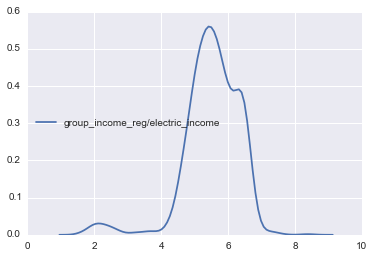

In [69]:
#Removes zeros from chosen column
income = survey[survey['group_income_reg/electric_income']>0]['group_income_reg/electric_income']
#Removes NAs, converts to log scale, and plots
sns.kdeplot(data=np.log10(income.dropna()))

###Box and Violin Plots (Seaborn):

Because I am using a logarithmic scale, it is necessary to remove NAs and zeros.  However I wanted to display the zeros, to make sure they are taken into account as outliers.  Therefore I used the .replace function to replace the zero values in the incomefreq column with ones, which appear as zeros on a logarithmic scale.  

In [70]:
survey['incomefreq'] = pysentani.income_monthly(survey)
survey['access_type'] = pysentani.access_type(survey)
survey['incomefreq'] = survey['incomefreq'].replace(0, 1)

This code formats and displays a box plot which shows the income distribution by power access_type:

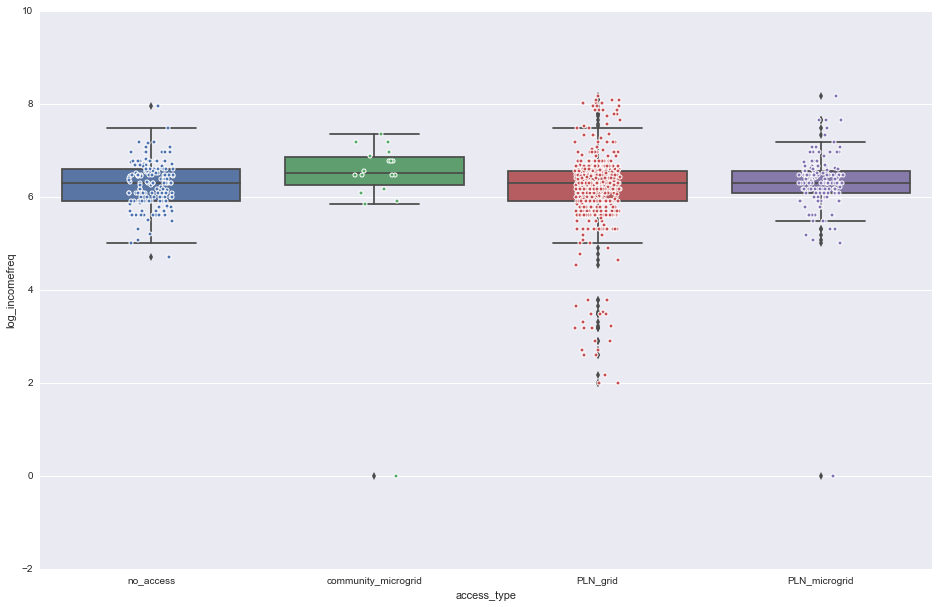

In [71]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 16
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
survey['log_incomefreq'] = np.log10(survey['incomefreq'])
box = sns.boxplot(x="access_type",y="log_incomefreq",data=survey)
jitter = sns.stripplot(x="access_type",y="log_incomefreq",data=survey,jitter=True,size=4)

This code displays a violin plot of the same data:

(The advantage of the violin plot is that it clearly shows - and allows easy comparison of - data point distribution)

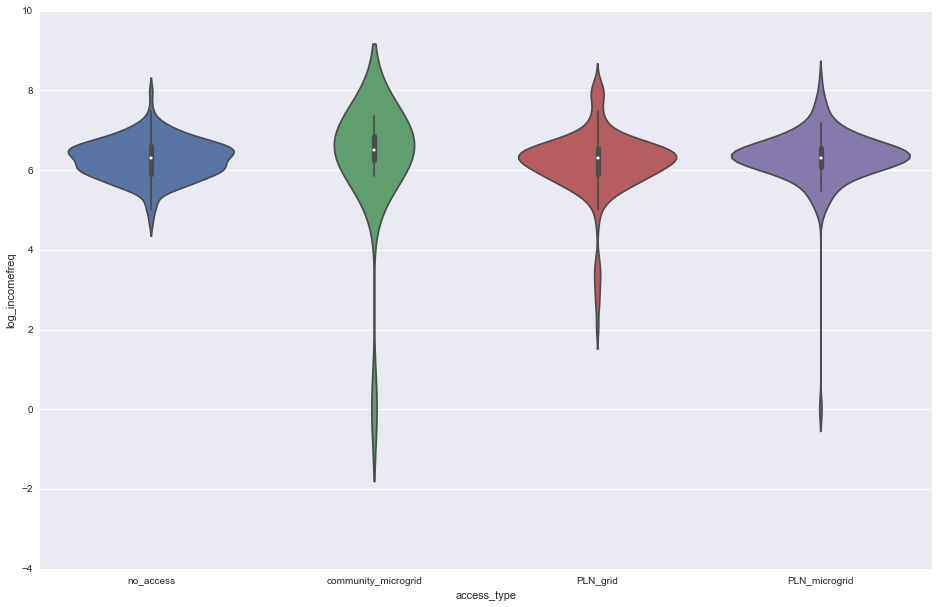

In [72]:
sns.violinplot(x="access_type",y="log_incomefreq",data=survey)

###Comparison of Mean Incomes W/ and W/out Zeros:

Notes: I was interested to see how much zero-values entered had affected the mean incomes (by access_type) so I did a comparison by using the .groupby function


####With Zeros and NAs

In [73]:
survey['incomefreq'] = pysentani.income_monthly(survey)
survey['access_type'] = pysentani.access_type(survey)
survey.groupby('access_type')['incomefreq'].mean()

access_type
PLN_grid               6144277.136452
PLN_microgrid          5272740.740741
community_microgrid    5932777.777778
no_access              3616245.161290
Name: incomefreq, dtype: float64

####Without Zeros and NAs

In [74]:
incomefreq = pysentani.income_monthly(survey)
incomefreq = incomefreq[incomefreq >0]
survey['incomefreq'] = incomefreq.dropna()
survey['access_type'] = pysentani.access_type(survey)
survey.groupby('access_type')['incomefreq'].mean()

access_type
PLN_grid               6144277.136452
PLN_microgrid          5312089.552239
community_microgrid    6281764.705882
no_access              3616245.161290
Name: incomefreq, dtype: float64

###Willingness to Pay by Income:

####Monthly Rate:

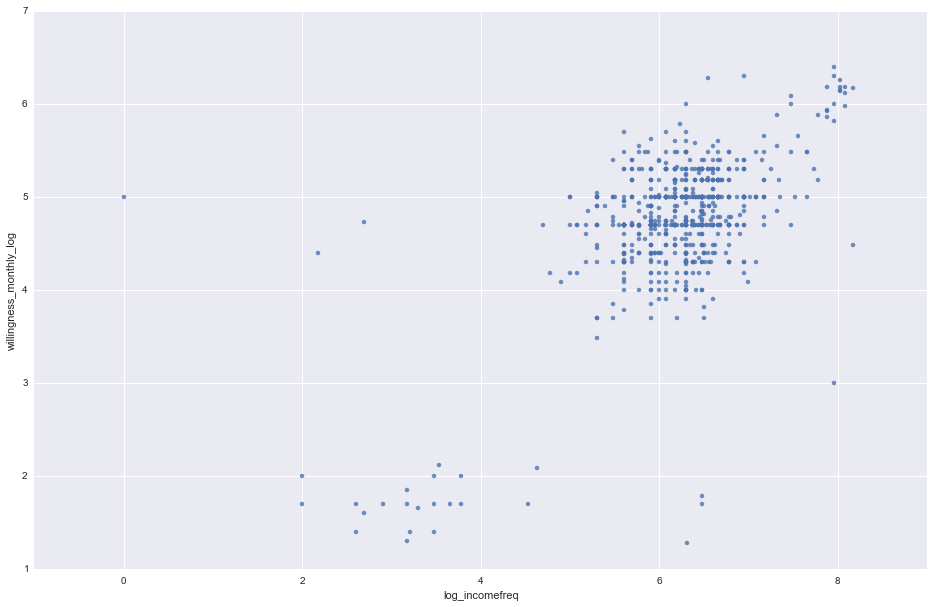

In [75]:
survey['willingness_monthly_log'] = np.log10(survey['willingness_monthly'])
sns.regplot(x= "log_incomefreq",y="willingness_monthly_log",data=survey)

####Connection Fee:

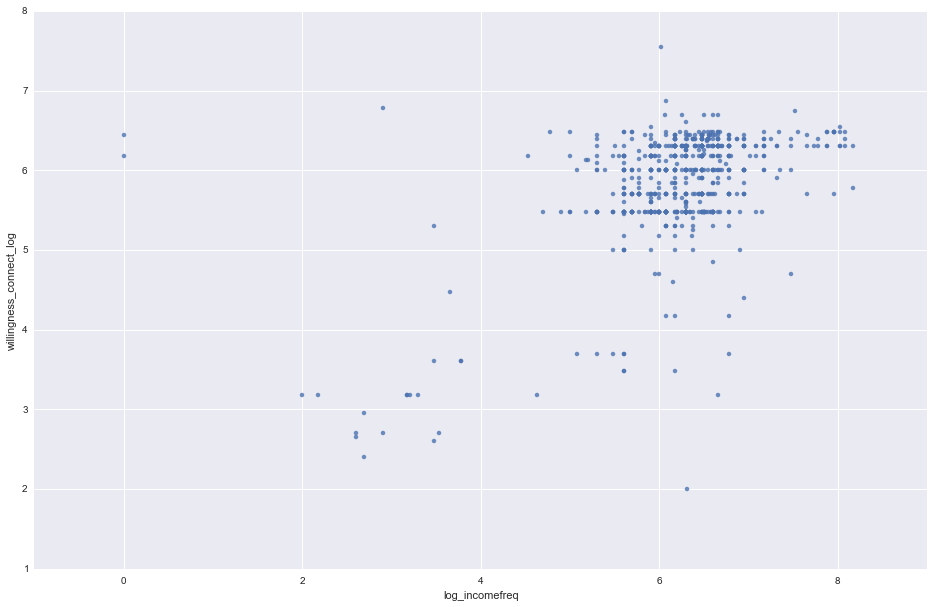

In [76]:
survey['willingness_connect_log'] = np.log10(survey['willingness_connect'])
sns.regplot(x= "log_incomefreq",y="willingness_connect_log",data=survey)

The code for these two plots can be generalized for continuous categories.